![](ITD.png)
    
# Analisis de Datos Masivos
## Contador SQL de Internet

## Nombre del Docente
## Jose Gabriel Rodriguez Rivas

## Nombre del Alumno
## Jose Guadalupe Calderon Perez

#### Conectarse a la base de datos

In [1]:
# this is the library to talk to the database
import sqlite3
import pandas as pd
# this is a library for data vizualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opened in a new window
%matplotlib inline

In [2]:
conn = sqlite3.connect('C:/Users/JoseC/Python/Unidad 2/InternetSpeed.db')

In [3]:
cur = conn.cursor()

In [4]:
Consulta = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10;'
cur.execute(Consulta)

In [5]:
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [6]:
Consulta = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10;'
cur.execute(Consulta)

In [7]:
for row in cur:
    print(row)

('2016-12-12 12:00:00.000000',)
('2016-12-05 12:00:00.000000',)
('2016-12-13 03:30:00.000000',)
('2016-11-29 17:30:00.000000',)
('2016-11-24 16:00:00.000000',)
('2016-12-08 14:00:00.000000',)
('2016-12-06 15:30:00.000000',)
('2016-11-28 17:00:00.000000',)
('2016-11-27 23:00:00.000000',)
('2016-12-13 09:00:00.000000',)


In [8]:
Consulta = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(Consulta)
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [9]:
# loop over the header and store them in a list
columns = [member[0] for member in cur.description]

# ignore index column
columns = columns[1:]

In [10]:
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
columns = [c.replace('_u', '') for c in columns]
# this operation is to remove duplicates
columns = list(set(columns))

In [11]:
columns[:10]

['E07000221',
 'E07000213',
 'E07000005',
 'E07000122',
 'E08000001',
 'E08000023',
 'E06000012',
 'E07000146',
 'E08000017',
 'E07000176']

In [12]:
area = columns[0]
print (area)

E07000221


In [13]:
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print (suffix.keys())

# we have the complete names as the values of the dictionary
print (suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000221')

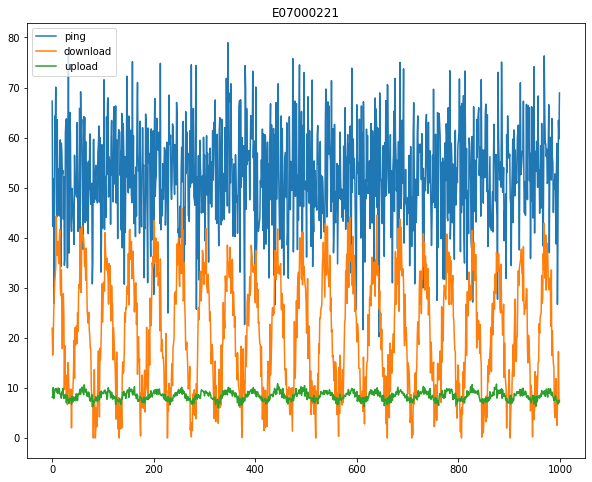

In [14]:
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    Consulta = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area,s)
    cur.execute(Consulta)
    plt.plot(list(cur.fetchall()), label=suffix[s])
plt.legend()
plt.title(area)

![](Grafica1_ContadorSQL.png)

#### Manipular datos con Pandas

In [15]:
new_columns = ['Area', 'Ping_Prom', 'Descarga_Prom', 'Carga_Prom']

df = pd.DataFrame(columns = new_columns)
df

,Area,Ping_Prom,Descarga_Prom,Carga_Prom


In [16]:
# this will take a while...
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        Consulta = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i], s)
        
        cur.execute(Consulta)
        
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# visualize the head of the dataframe here
df.head(5)

,Area,Ping_Prom,Descarga_Prom,Carga_Prom
0,E07000221,52.421030,21.080782,8.448097
1,E07000213,51.764906,21.206035,8.358611
2,E07000005,51.607898,20.853906,8.337848
3,E07000122,52.232849,20.966287,8.312183
4,E08000001,54.884848,22.571545,9.024592


In [17]:
len(df)

326

In [18]:
df

,Area,Ping_Prom,Descarga_Prom,Carga_Prom
0,E07000221,52.421030,21.080782,8.448097
1,E07000213,51.764906,21.206035,8.358611
2,E07000005,51.607898,20.853906,8.337848
3,E07000122,52.232849,20.966287,8.312183
4,E08000001,54.884848,22.571545,9.024592
...,...,...,...,...
321,E07000139,51.453604,21.106050,8.417493
322,E07000145,52.112795,21.174215,8.386445
323,E09000014,53.680858,22.446388,8.940971
324,E07000112,51.965947,21.063988,8.394836


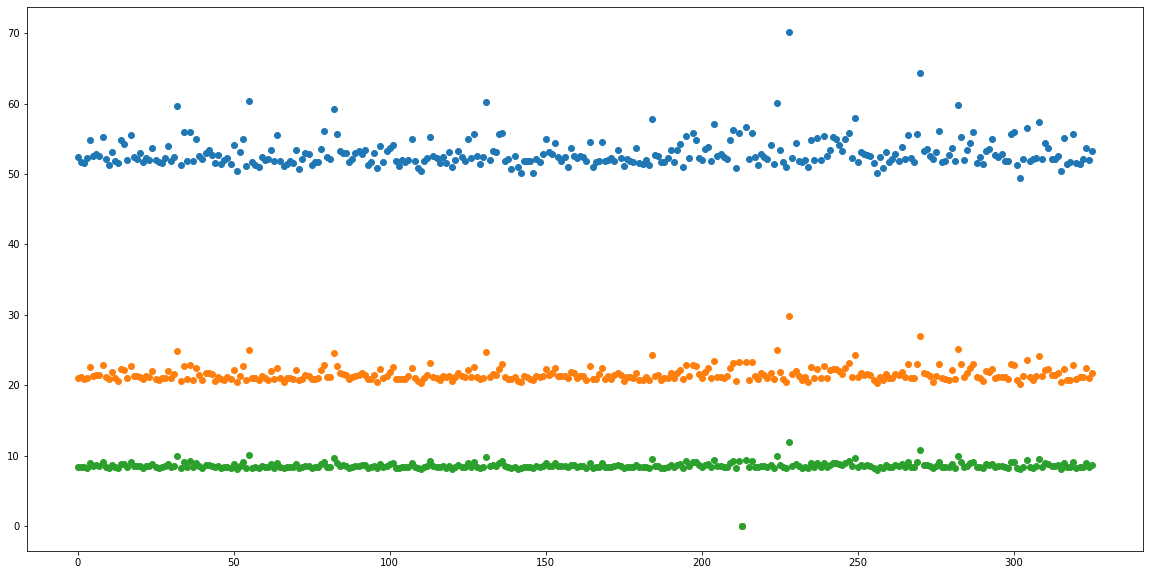

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Ping_Prom','Descarga_Prom','Carga_Prom']], 'o')

![](Grafica2_ContadorSQL.png)

In [20]:
# Make sure to drop the table first if it already exists
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

# what is the name of the table you want to save? To what connection?
# Save the dataframe table into a SQL table
df.to_sql('Velocidad_Promedio', conn)

ValueError: Table 'Velocidad_Promedio' already exists.

In [21]:
# just checking everything worked fine: select everything from the table we just created
# and then print the first two rows of the result

query_2 = 'SELECT * FROM Velocidad_Promedio'
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

(0, 'E07000235', 50.90066746295562, 20.642734120737746, 8.274659908303153)
(1, 'E06000037', 53.24593492228075, 21.67418309568216, 8.57896456238587)


#### Unir 2 tablas

In [22]:
Consulta = 'SELECT * FROM LA_population LIMIT 10'
cur.execute(Consulta)
for row in cur:
    print(row)

('Aberdeen City', 'S12000033', 222793)
('Aberdeenshire', 'S12000034', 252973)
('Adur', 'E07000223', 61182)
('Allerdale', 'E07000026', 96422)
('Amber Valley', 'E07000032', 122309)
('Angus', 'S12000041', 115978)
('Antrim and Newtownabbey', 'N09000001', 138567)
('Ards and North Down', 'N09000011', 156672)
('Argyll and Bute', 'S12000035', 88166)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693)


In [23]:
query = 'SELECT * FROM Velocidad_Promedio JOIN LA_population ON LA_population."LA_code"=Velocidad_Promedio.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print(row)
    
    k+=1

(0, 'E07000235', 50.90066746295562, 20.642734120737746, 8.274659908303153, 'Malvern Hills', 'E07000235', 74631)
(1, 'E06000037', 53.24593492228075, 21.67418309568216, 8.57896456238587, 'West Berkshire', 'E06000037', 153822)
(2, 'E07000044', 51.743183497803535, 20.974790708551236, 8.306129552459, 'South Hams', 'E07000044', 83140)
(3, 'E06000054', 57.912725727189745, 24.33652672372286, 9.739612285563982, 'Wiltshire', 'E06000054', 470981)
(4, 'E06000022', 53.60353016787772, 21.88471554976137, 8.63837469516141, 'Bath and North East Somerset', 'E06000022', 176016)
(5, 'E07000108', 52.4286155041037, 21.057930838765685, 8.429612462922629, 'Dover', 'E07000108', 111674)
(6, 'E06000015', 54.93447752674741, 22.38706665857376, 8.95783448218355, 'Derby', 'E06000015', 248752)
(7, 'E07000151', 51.856516817308595, 20.904927742219773, 8.297922252859212, 'Daventry', 'E07000151', 77843)
(8, 'E07000150', 50.97748875656158, 20.443365429764157, 8.229806275881225, 'Corby', 'E07000150', 61255)
(9, 'E07000236'